In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
data = pd.read_csv("flag.data", header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Western-Samoa,6,3,3,0,1,1,0,0,3,...,0,1,5,0,0,0,0,0,blue,red
190,Yugoslavia,3,1,256,22,6,6,0,3,4,...,0,0,1,0,0,0,0,0,blue,red
191,Zaire,4,2,905,28,10,5,0,0,4,...,0,0,0,0,0,1,1,0,green,green
192,Zambia,4,2,753,6,10,5,3,0,4,...,0,0,0,0,0,0,1,0,green,brown


In [3]:
with open("flag.names") as names_file:
    file_data = names_file.read()
attributes = file_data.split("7. Attribute Information:")[-1].split("8. Missing values:")[0].strip()
attributes

'1. name\tName of the country concerned\n   2. landmass\t1=N.America, 2=S.America, 3=Europe, 4=Africa, 4=Asia, 6=Oceania\n   3. zone\tGeographic quadrant, based on Greenwich and the Equator\n                1=NE, 2=SE, 3=SW, 4=NW\n   4. area\tin thousands of square km\n   5. population\tin round millions\n   6. language 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other \n               Indo-European, 7=Chinese, 8=Arabic, \n               9=Japanese/Turkish/Finnish/Magyar, 10=Others\n   7. religion 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu,\n               5=Ethnic, 6=Marxist, 7=Others\n   8. bars     Number of vertical bars in the flag\n   9. stripes  Number of horizontal stripes in the flag\n  10. colours  Number of different colours in the flag\n  11. red      0 if red absent, 1 if red present in the flag\n  12. green    same for green\n  13. blue     same for blue\n  14. gold     same for gold (also yellow)\n  15. white    same for white\n  16. black    

In [4]:
colnames = re.findall("\d+\.\s*(\w*)[\t|\s+]", attributes)
colnames

['name',
 'landmass',
 'zone',
 'area',
 'population',
 'language',
 'religion',
 'bars',
 'stripes',
 'colours',
 'red',
 'green',
 'blue',
 'gold',
 'white',
 'black',
 'orange',
 'mainhue',
 'circles',
 'crosses',
 'saltires',
 'quarters',
 'sunstars',
 'crescent',
 'triangle',
 'icon',
 'animate',
 'text',
 'topleft',
 'botright']

In [5]:
data.columns = colnames
data

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Western-Samoa,6,3,3,0,1,1,0,0,3,...,0,1,5,0,0,0,0,0,blue,red
190,Yugoslavia,3,1,256,22,6,6,0,3,4,...,0,0,1,0,0,0,0,0,blue,red
191,Zaire,4,2,905,28,10,5,0,0,4,...,0,0,0,0,0,1,1,0,green,green
192,Zambia,4,2,753,6,10,5,3,0,4,...,0,0,0,0,0,0,1,0,green,brown


In [6]:
# Common colours in flags
common_colours = data[["red", "green", "blue", "gold", "white", "black", "orange"]].sum().sort_values(ascending=False).to_frame().reset_index().rename(columns={"index": "colour", 0: "count"})
common_colours

,colour,count
0,red,153
1,white,146
2,blue,99
3,gold,91
4,green,91
5,black,52
6,orange,26


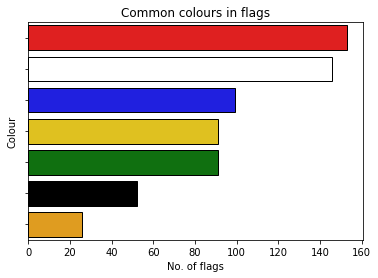

In [7]:
palette = ["red", "white", "blue", "gold", "green", "black", "orange"]
p = sns.barplot(x="count", y="colour", data=common_colours, palette=palette, edgecolor="black")
p.set(yticklabels=[], xlabel="No. of flags", ylabel="Colour")
p.set(title="Common colours in flags")
plt.show()

In [8]:
common_colours["pct"] = (round(100 * common_colours["count"] / len(data), 1))
common_colours

,colour,count,pct
0,red,153,78.9
1,white,146,75.3
2,blue,99,51.0
3,gold,91,46.9
4,green,91,46.9
5,black,52,26.8
6,orange,26,13.4


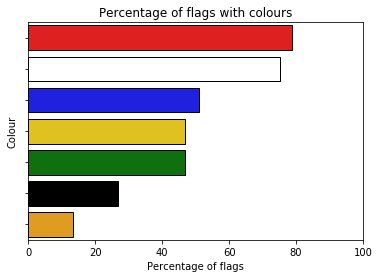

In [9]:
palette = ["red", "white", "blue", "gold", "green", "black", "orange"]
p = sns.barplot(x="pct", y="colour", data=common_colours, palette=palette, edgecolor="black")
p.set(xlim=(0, 100))
p.set(yticklabels=[], xlabel="Percentage of flags", ylabel="Colour")
p.set(title="Percentage of flags with colours")
plt.show()

In [10]:
data.bars.value_counts()

0    159
3     21
2      7
1      6
5      1
Name: bars, dtype: int64

In [11]:
data[data["bars"] == 5]

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
161,St-Vincent,1,4,0,0,1,1,5,0,4,...,0,0,0,0,0,1,1,1,blue,green


There are 159 flags with no bars and one country with five bars (St-Vincent (After some research, the old flag had 5 vertical bars. Current one has only three.)).

In [12]:
data.colours.value_counts()

3    75
4    44
2    42
5    15
6     9
7     7
8     1
1     1
Name: colours, dtype: int64

In [13]:
data[data.colours == 8]

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
17,Belize,1,4,23,0,1,1,0,2,8,...,0,0,0,0,0,1,1,1,red,red


A majority of flags have 3 colours. Many more have either 2 or 4 colours. There is one country with 8 colours. This is the highest number of colours in a single flag.

In [14]:
bar_flags = data[data["bars"] != 0]
bar_flags

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
15,Barbados,1,4,0,0,1,1,3,0,3,...,0,0,0,0,0,1,0,0,blue,blue
16,Belgium,3,1,31,10,6,0,3,0,3,...,0,0,0,0,0,0,0,0,black,red
30,Cameroon,4,1,474,8,3,1,3,0,3,...,0,0,1,0,0,0,0,0,green,gold
31,Canada,1,4,9976,24,1,1,2,0,2,...,0,0,0,0,0,0,1,0,red,red
32,Cape-Verde-Islands,4,4,4,0,6,0,1,2,5,...,0,0,1,0,0,0,1,0,red,green
34,Central-African-Republic,4,1,623,2,10,5,1,0,5,...,0,0,1,0,0,0,0,0,blue,gold
35,Chad,4,1,1284,4,3,5,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
59,France,3,1,547,54,3,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [15]:
# Common colours in flags with vertical bars
common_bar_colours = bar_flags[["red", "green", "blue", "gold", "white", "black", "orange"]].sum().sort_values(ascending=False).to_frame().reset_index().rename(columns={"index": "colour", 0: "count"})
common_bar_colours

,colour,count
0,red,28
1,green,22
2,white,20
3,gold,17
4,blue,11
5,black,10
6,orange,6


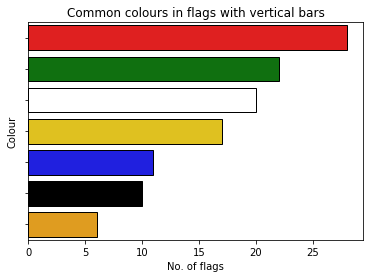

In [16]:
palette = ["red", "green", "white", "gold", "blue", "black", "orange"]
p = sns.barplot(x="count", y="colour", data=common_bar_colours, palette=palette, edgecolor="black")
p.set(yticklabels=[], xlabel="No. of flags", ylabel="Colour")
p.set(title="Common colours in flags with vertical bars")
plt.show()

In [17]:
data.stripes.value_counts()

0     110
3      44
2      16
5      12
1       4
9       2
14      1
13      1
11      1
7       1
6       1
4       1
Name: stripes, dtype: int64

In [18]:
data[data.stripes > 10]

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
99,Liberia,4,4,111,1,10,5,0,11,3,...,0,1,1,0,0,0,0,0,blue,red
105,Malaysia,5,1,333,13,10,2,0,14,4,...,0,1,1,1,0,0,0,0,blue,white
183,USA,1,4,9363,231,1,1,0,13,3,...,0,1,50,0,0,0,0,0,blue,red


In [19]:
data[data.stripes == 9]

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
68,Greece,3,1,132,10,6,1,0,9,2,...,0,1,0,0,0,0,0,0,blue,blue
181,Uruguay,2,3,178,3,2,0,0,9,3,...,0,1,1,0,0,0,0,0,white,white


Like vertical bars, three horizontal stripes are the most common among flags with stripes. But there are 3 countries with more than 10 stripes. Liberia, Malaysia and the USA all have similar flags. Greece and Uruguay have 9 stripes.

In [20]:
stripe_flags = data[data.stripes != 0]
stripe_flags

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
5,Angola,4,2,1247,7,10,5,0,2,3,...,0,0,1,0,0,1,0,0,red,black
6,Anguilla,1,4,0,0,1,1,0,1,3,...,0,0,0,0,0,0,1,0,white,blue
7,Antigua-Barbuda,1,4,0,0,1,1,0,1,5,...,0,0,1,0,1,0,0,0,black,red
8,Argentina,2,3,2777,28,2,0,0,3,2,...,0,0,0,0,0,0,0,0,blue,blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,Uruguay,2,3,178,3,2,0,0,9,3,...,0,1,1,0,0,0,0,0,white,white
183,USA,1,4,9363,231,1,1,0,13,3,...,0,1,50,0,0,0,0,0,blue,red
187,Venezuela,2,4,912,15,2,0,0,3,7,...,0,0,7,0,0,1,1,0,gold,red
190,Yugoslavia,3,1,256,22,6,6,0,3,4,...,0,0,1,0,0,0,0,0,blue,red


There are a lot more flags with horizontal stripes (84) than there were vertical bars (35).

In [21]:
# Common colours in flags with horizontal stripes
common_stripe_colours = stripe_flags[["red", "green", "blue", "gold", "white", "black", "orange"]].sum().sort_values(ascending=False).to_frame().reset_index().rename(columns={"index": "colour", 0: "count"})
common_stripe_colours

,colour,count
0,red,67
1,white,66
2,blue,45
3,green,38
4,gold,37
5,black,30
6,orange,9


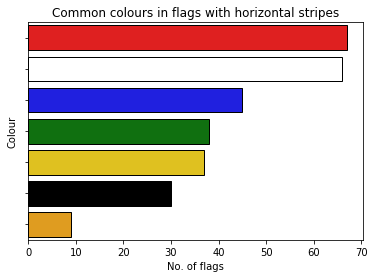

In [22]:
palette = ["red", "white", "blue", "green", "gold", "black", "orange"]
p = sns.barplot(x="count", y="colour", data=common_stripe_colours, palette=palette, edgecolor="black")
p.set(yticklabels=[], xlabel="No. of flags", ylabel="Colour")
p.set(title="Common colours in flags with horizontal stripes")
plt.show()

Red still remains the most popular colour. But white and blue have more represnatation.

In [23]:
data.loc[data.crosses != 0]

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
10,Australia,6,2,7690,15,1,1,0,0,3,...,1,1,6,0,0,0,0,0,white,blue
19,Bermuda,1,4,0,0,1,1,0,0,6,...,1,1,0,0,0,1,1,0,white,red
24,British-Virgin-Isles,1,4,0,0,1,1,0,0,6,...,1,1,0,0,0,1,1,1,white,blue
33,Cayman-Islands,1,4,0,0,1,1,0,0,6,...,1,1,4,0,0,1,1,1,white,blue
41,Cook-Islands,6,3,0,0,1,1,0,0,4,...,1,1,15,0,0,0,0,0,white,blue
46,Denmark,3,1,43,5,6,1,0,0,2,...,0,0,0,0,0,0,0,0,red,red
49,Dominican-Republic,1,4,49,6,2,0,0,0,3,...,0,0,0,0,0,0,0,0,blue,blue
55,Faeroes,3,4,1,0,6,1,0,0,3,...,0,0,0,0,0,0,0,0,white,white
56,Falklands-Malvinas,2,3,12,0,1,1,0,0,6,...,1,1,0,0,0,1,1,1,white,blue
57,Fiji,6,2,18,1,1,1,0,0,7,...,1,1,0,0,0,1,1,0,white,blue


In [24]:
data.crosses.sum()

29

In [25]:
data[data.crosses > 1]

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
57,Fiji,6,2,18,1,1,1,0,0,7,...,1,1,0,0,0,1,1,0,white,blue
116,Montserrat,1,4,0,0,1,1,0,0,7,...,1,1,0,0,0,1,1,0,white,blue


27 flags have crosses. Two flags have two crosses.

In [26]:
data.loc[data.saltires != 0]

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
10,Australia,6,2,7690,15,1,1,0,0,3,...,1,1,6,0,0,0,0,0,white,blue
19,Bermuda,1,4,0,0,1,1,0,0,6,...,1,1,0,0,0,1,1,0,white,red
24,British-Virgin-Isles,1,4,0,0,1,1,0,0,6,...,1,1,0,0,0,1,1,1,white,blue
29,Burundi,4,2,28,4,10,5,0,0,3,...,1,0,3,0,0,0,0,0,white,white
33,Cayman-Islands,1,4,0,0,1,1,0,0,6,...,1,1,4,0,0,1,1,1,white,blue
41,Cook-Islands,6,3,0,0,1,1,0,0,4,...,1,1,15,0,0,0,0,0,white,blue
56,Falklands-Malvinas,2,3,12,0,1,1,0,0,6,...,1,1,0,0,0,1,1,1,white,blue
57,Fiji,6,2,18,1,1,1,0,0,7,...,1,1,0,0,0,1,1,0,white,blue
78,Hong-Kong,5,1,1,5,7,3,0,0,6,...,1,1,0,0,0,1,1,1,white,blue
89,Jamaica,1,4,11,2,1,1,0,0,3,...,1,0,0,0,1,0,0,0,gold,gold


In [27]:
data.saltires.sum()

18

18 flags have diagonal crosses.

In [28]:
data.loc[(data.saltires != 0) & (data.crosses != 0)]

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
10,Australia,6,2,7690,15,1,1,0,0,3,...,1,1,6,0,0,0,0,0,white,blue
19,Bermuda,1,4,0,0,1,1,0,0,6,...,1,1,0,0,0,1,1,0,white,red
24,British-Virgin-Isles,1,4,0,0,1,1,0,0,6,...,1,1,0,0,0,1,1,1,white,blue
33,Cayman-Islands,1,4,0,0,1,1,0,0,6,...,1,1,4,0,0,1,1,1,white,blue
41,Cook-Islands,6,3,0,0,1,1,0,0,4,...,1,1,15,0,0,0,0,0,white,blue
56,Falklands-Malvinas,2,3,12,0,1,1,0,0,6,...,1,1,0,0,0,1,1,1,white,blue
57,Fiji,6,2,18,1,1,1,0,0,7,...,1,1,0,0,0,1,1,0,white,blue
78,Hong-Kong,5,1,1,5,7,3,0,0,6,...,1,1,0,0,0,1,1,1,white,blue
116,Montserrat,1,4,0,0,1,1,0,0,7,...,1,1,0,0,0,1,1,0,white,blue
123,New-Zealand,6,2,268,2,1,1,0,0,3,...,1,1,4,0,0,0,0,0,white,blue


There are 16 flags with both simple and diagonal crosses. Almost all of these were part of the British Empire. South African flag here is the pre 1994 one as the current one does not have crosses.

In [29]:
data.loc[data.text != 0]

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
17,Belize,1,4,23,0,1,1,0,2,8,...,0,0,0,0,0,1,1,1,red,red
23,Brazil,2,3,8512,119,6,0,0,0,4,...,0,0,22,0,0,0,0,1,green,green
24,British-Virgin-Isles,1,4,0,0,1,1,0,0,6,...,1,1,0,0,0,1,1,1,white,blue
25,Brunei,5,1,6,0,10,2,0,0,4,...,0,0,0,0,1,1,1,1,white,gold
33,Cayman-Islands,1,4,0,0,1,1,0,0,6,...,1,1,4,0,0,1,1,1,white,blue
51,Egypt,4,1,1001,47,8,2,0,3,4,...,0,0,0,0,0,0,1,1,red,black
56,Falklands-Malvinas,2,3,12,0,1,1,0,0,6,...,1,1,0,0,0,1,1,1,white,blue
71,Guam,6,1,0,0,1,1,0,0,7,...,0,0,0,0,0,1,1,1,red,red
78,Hong-Kong,5,1,1,5,7,3,0,0,6,...,1,1,0,0,0,1,1,1,white,blue
83,Iran,5,1,1648,39,6,2,0,3,3,...,0,0,0,0,0,1,0,1,green,red


16 countries have text on their flag

### Clustering

In [30]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [74]:
cluster_df = data.drop(['landmass', 'zone', 'area', 'population', 'language', 'religion'], axis=1)
cluster_df

,name,bars,stripes,colours,red,green,blue,gold,white,black,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,0,3,5,1,1,0,1,1,1,...,0,0,1,0,0,1,0,0,black,green
1,Albania,0,0,3,1,0,0,1,0,1,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,2,0,3,1,1,0,0,1,0,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,0,0,5,1,0,1,1,1,0,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,0,3,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,blue,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Western-Samoa,0,0,3,1,0,1,0,1,0,...,0,1,5,0,0,0,0,0,blue,red
190,Yugoslavia,0,3,4,1,0,1,1,1,0,...,0,0,1,0,0,0,0,0,blue,red
191,Zaire,0,0,4,1,1,0,1,0,0,...,0,0,0,0,0,1,1,0,green,green
192,Zambia,3,0,4,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,green,brown


Removed non flag features from flag

In [75]:
cluster_df.topleft.value_counts()

red       56
blue      43
white     41
green     32
black     12
gold       6
orange     4
Name: topleft, dtype: int64

In [76]:
cluster_df.botright.value_counts()

red       69
blue      47
green     40
white     17
gold       9
black      9
brown      2
orange     1
Name: botright, dtype: int64

In [77]:
cluster_df.topleft.unique().tolist()
le_topleft = LabelEncoder()
le_topleft.fit(cluster_df.topleft.unique().tolist())
le_topleft.classes_

array(['black', 'blue', 'gold', 'green', 'orange', 'red', 'white'],
      dtype='<U6')

In [78]:
cluster_df.botright.unique().tolist()
le_botright = LabelEncoder()
le_botright.fit(cluster_df.botright.unique().tolist())
le_botright.classes_

array(['black', 'blue', 'brown', 'gold', 'green', 'orange', 'red',
       'white'], dtype='<U6')

In [79]:
cluster_df.mainhue.unique().tolist()
le_mainhue = LabelEncoder()
le_mainhue.fit(cluster_df.mainhue.unique().tolist())
le_mainhue.classes_

array(['black', 'blue', 'brown', 'gold', 'green', 'orange', 'red',
       'white'], dtype='<U6')

In [80]:
cluster_df["topleft"] = le_topleft.transform(cluster_df.topleft)
cluster_df["botright"] = le_botright.transform(cluster_df.botright)
cluster_df["mainhue"] = le_mainhue.transform(cluster_df.mainhue)

In [84]:
def modify(x):
    if x == 0:
        return 0
    else:
        return 1

In [91]:
transform_params = ["bars", "stripes", "circles", "crosses", "saltires", "quarters", "sunstars"]
for param in transform_params:
    cluster_df[param] = cluster_df[param].apply(modify)

In [92]:
cluster_df

,name,bars,stripes,colours,red,green,blue,gold,white,black,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,0,1,5,1,1,0,1,1,1,...,0,0,1,0,0,1,0,0,0,4
1,Albania,0,0,3,1,0,0,1,0,1,...,0,0,1,0,0,0,1,0,5,6
2,Algeria,1,0,3,1,1,0,0,1,0,...,0,0,1,1,0,0,0,0,3,7
3,American-Samoa,0,0,5,1,0,1,1,1,0,...,0,0,0,0,1,1,1,0,1,6
4,Andorra,1,0,3,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Western-Samoa,0,0,3,1,0,1,0,1,0,...,0,1,1,0,0,0,0,0,1,6
190,Yugoslavia,0,1,4,1,0,1,1,1,0,...,0,0,1,0,0,0,0,0,1,6
191,Zaire,0,0,4,1,1,0,1,0,0,...,0,0,0,0,0,1,1,0,3,4
192,Zambia,1,0,4,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,3,2


In [93]:
cluster_df.dtypes

name        object
bars         int64
stripes      int64
colours      int64
red          int64
green        int64
blue         int64
gold         int64
white        int64
black        int64
orange       int64
mainhue      int32
circles      int64
crosses      int64
saltires     int64
quarters     int64
sunstars     int64
crescent     int64
triangle     int64
icon         int64
animate      int64
text         int64
topleft      int32
botright     int32
dtype: object

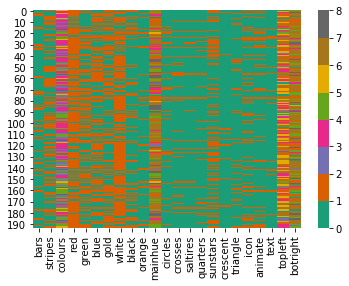

In [94]:
sns.heatmap(cluster_df.drop(["name"], axis=1), cmap="Dark2")

No NAN values and all params have numeric values

In [95]:
features_to_consider = [
    "bars", "stripes", "circles", "crosses", "saltires",
    "quarters", "sunstars", "crescent", "triangle", 
    "icon", "animate"
]
inertias = []
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(cluster_df[features_to_consider])
    inertias.append(kmeans.inertia_)

In [96]:
inertias

[255.99480519480522,
 217.26958525345623,
 192.68391216991964,
 169.76573866603215,
 156.06395609318997,
 143.30749305904584,
 132.64217912499004,
 121.90446173189508,
 111.76699687084442,
 106.18526392961877,
 101.38852443852444,
 94.01172067272311,
 92.77223466188984,
 85.04196806777452,
 83.61881027469263,
 78.82607142857142,
 76.01636904761905,
 69.38851294903927,
 66.05728291316527]

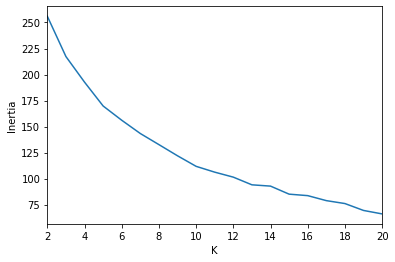

In [97]:
p = sns.lineplot(x=list(range(2, 21)), y=inertias)
p.set(xlabel="K", ylabel="Inertia")
p.set(xlim = (2, 20))
plt.show()

k= 8 seems to be the best candidate

In [98]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(cluster_df[features_to_consider])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [99]:
kmeans.labels_

array([0, 1, 1, 4, 3, 0, 2, 5, 2, 5, 8, 2, 2, 1, 1, 3, 3, 4, 1, 7, 4, 2,
       2, 1, 7, 4, 0, 5, 0, 1, 1, 3, 0, 7, 1, 3, 5, 1, 2, 1, 0, 8, 2, 5,
       4, 6, 9, 6, 1, 9, 2, 2, 2, 2, 2, 9, 7, 7, 9, 3, 3, 0, 2, 2, 2, 2,
       5, 2, 9, 1, 6, 4, 3, 3, 5, 6, 3, 5, 7, 2, 9, 2, 2, 2, 5, 3, 5, 3,
       3, 6, 1, 5, 4, 2, 0, 2, 2, 2, 3, 5, 1, 2, 2, 2, 5, 5, 1, 3, 3, 0,
       1, 2, 3, 1, 2, 6, 7, 1, 0, 5, 1, 2, 5, 8, 2, 2, 3, 8, 5, 5, 9, 2,
       1, 1, 6, 0, 3, 6, 2, 4, 5, 1, 0, 3, 2, 5, 4, 1, 1, 2, 5, 6, 1, 9,
       4, 5, 2, 4, 7, 6, 6, 4, 2, 5, 2, 9, 9, 5, 1, 6, 2, 5, 9, 6, 1, 1,
       7, 8, 2, 2, 9, 5, 4, 5, 0, 6, 3, 0, 1, 1, 5, 4, 3, 0])

In [100]:
cluster_df["cluster_no"] = kmeans.labels_.tolist()

In [101]:
cluster_df

,name,bars,stripes,colours,red,green,blue,gold,white,black,...,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright,cluster_no
0,Afghanistan,0,1,5,1,1,0,1,1,1,...,0,1,0,0,1,0,0,0,4,0
1,Albania,0,0,3,1,0,0,1,0,1,...,0,1,0,0,0,1,0,5,6,1
2,Algeria,1,0,3,1,1,0,0,1,0,...,0,1,1,0,0,0,0,3,7,1
3,American-Samoa,0,0,5,1,0,1,1,1,0,...,0,0,0,1,1,1,0,1,6,4
4,Andorra,1,0,3,1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Western-Samoa,0,0,3,1,0,1,0,1,0,...,1,1,0,0,0,0,0,1,6,1
190,Yugoslavia,0,1,4,1,0,1,1,1,0,...,0,1,0,0,0,0,0,1,6,5
191,Zaire,0,0,4,1,1,0,1,0,0,...,0,0,0,0,1,1,0,3,4,4
192,Zambia,1,0,4,1,1,0,0,0,1,...,0,0,0,0,0,1,0,3,2,3


In [145]:
groups = cluster_df.groupby("cluster_no")

In [158]:
output_dict = {}
for i, group in enumerate(groups):
    print(i, group[1].name.tolist())
    output_dict[i] = group[1].name.tolist()

0 ['Afghanistan', 'Angola', 'Bulgaria', 'Burma', 'Cape-Verde-Islands', 'Congo', 'French-Polynesia', 'Kiribati', 'Marianas', 'Mozambique', 'Parguay', 'Romania', 'USSR', 'Venezuela', 'Zimbabwe']
1 ['Albania', 'Algeria', 'Bahrain', 'Bangladesh', 'Benin', 'Brazil', 'Burundi', 'Cameroon', 'Central-African-Republic', 'China', 'Comorro-Islands', 'Dominica', 'Greenland', 'Japan', 'Libya', 'Maldive-Islands', 'Mauritania', 'Micronesia', 'Morocco', 'Nepal', 'Pakistan', 'Panama', 'Qatar', 'Senegal', 'Seychelles', 'Somalia', 'Taiwan', 'Tunisia', 'Turkey', 'Vietnam', 'Western-Samoa']
2 ['Anguilla', 'Argentina', 'Austria', 'Bahamas', 'Bolivia', 'Botswana', 'Colombia', 'Costa-Rica', 'Ecuador', 'Egypt', 'El-Salvador', 'Equatorial-Guinea', 'Ethiopia', 'Gabon', 'Gambia', 'Germany-DDR', 'Germany-FRG', 'Gibraltar', 'Hungary', 'India', 'Indonesia', 'Iran', 'Kenya', 'Kuwait', 'Laos', 'Lebanon', 'Liechtenstein', 'Luxembourg', 'Malagasy', 'Mauritius', 'Monaco', 'Netherlands', 'Nicaragua', 'Niger', 'Oman', 'Pol

In [163]:
val_counts = [len(val) for val in output_dict.values()]

In [164]:
max(val_counts)

44

In [159]:
pd.DataFrame.from_dict(output_dict)

ValueError: arrays must all be same length

In [160]:
output_dict

{0: ['Afghanistan',
  'Angola',
  'Bulgaria',
  'Burma',
  'Cape-Verde-Islands',
  'Congo',
  'French-Polynesia',
  'Kiribati',
  'Marianas',
  'Mozambique',
  'Parguay',
  'Romania',
  'USSR',
  'Venezuela',
  'Zimbabwe'],
 1: ['Albania',
  'Algeria',
  'Bahrain',
  'Bangladesh',
  'Benin',
  'Brazil',
  'Burundi',
  'Cameroon',
  'Central-African-Republic',
  'China',
  'Comorro-Islands',
  'Dominica',
  'Greenland',
  'Japan',
  'Libya',
  'Maldive-Islands',
  'Mauritania',
  'Micronesia',
  'Morocco',
  'Nepal',
  'Pakistan',
  'Panama',
  'Qatar',
  'Senegal',
  'Seychelles',
  'Somalia',
  'Taiwan',
  'Tunisia',
  'Turkey',
  'Vietnam',
  'Western-Samoa'],
 2: ['Anguilla',
  'Argentina',
  'Austria',
  'Bahamas',
  'Bolivia',
  'Botswana',
  'Colombia',
  'Costa-Rica',
  'Ecuador',
  'Egypt',
  'El-Salvador',
  'Equatorial-Guinea',
  'Ethiopia',
  'Gabon',
  'Gambia',
  'Germany-DDR',
  'Germany-FRG',
  'Gibraltar',
  'Hungary',
  'India',
  'Indonesia',
  'Iran',
  'Kenya',
  'K